NAME : CHANDRANI SENGUPTA 

COLLEGE : ST XAVIERS COLLEGE 

STREAM  : MSC DATA SCIENCE 

PREDICTION OF RESTUARANT RATINGS USING MACHINE LEARNING

Machine learning means collecting data and then preprocess the data and then split the data into training data and test data and use machine learning algorithms to build the model and train the model using training data and validate the model using test data 

Let us load the libraries first

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

The First step of machine learning is to load the csv file using pandas library

In [3]:
df=pd.read_csv("C:/Users/aniru/Downloads/Dataset .csv")

In [4]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

head() prints the first 5 rows of the dataset

Let us understand the data first . The data is about the ratings of restuarants in different localities and the factors affecting the ratings .

In [5]:
df.shape

(9551, 21)

The dataset has 9551 rows and 21 columns where rows represent the no of observations and columns represent the variables on which the observations are taken 

In [6]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

We use describe() to get some statistical insight about the numerical variables 

We see the mean for average cast for 2 is more and there is more variability in average cost for two and votes 

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We see there are no null values as such

In [8]:
df[df.duplicated]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]

We see there are no duplicate values as such 

Since we are using a linear regression model. The response here should be a numerical/Quantitative variable . Hence Aggregate Rating here is the response 

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df["Aggregate rating"].value_counts

<bound method IndexOpsMixin.value_counts of 0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64>

We see there are multiple outcomes 

We are done with our data preprocessing . Now let us encode the categorical variables

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

The numerical variables are Restuarant ID , Country Code , Longitude , Latitude ,Price range , Average cost for Two, Aggregate rating anf Votes and the rest are categorical variables 

In [12]:
cols=["Restaurant Name","City","Address","Locality","Locality Verbose","Cuisines","Average Cost for two","Currency","Has Table booking","Has Online delivery","Is delivering now","Switch to order menu","Rating color","Rating text"]
le=LabelEncoder()
d=df.copy()
for i in cols:
  df[i]=le.fit_transform(df[i])
df  

Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           6317637             3748           162    73     8685       171   
1           6304287             3172           162    73     6055       593   
2           6300002             2896           162    75     4684       308   
3           6318506             4707           162    75     8690       862   
4           6314302             5523           162    75     8689       862   
...             ...              ...           ...   ...      ...       ...   
9546        5915730             4443           208   140     5926       517   
9547        5908749             1310           208   140     5962       552   
9548        5915807             3068           208   140     5966       554   
9549        5916112              512           208   140     5967       554   
9550        5927402             7240           208   140     4258       670   

      Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0                  172  121.027535  14.565443       920  ...         0   
1                  601  121.014101  14.553708      1111  ...         0   
2                  314  121.056831  14.581404      1671  ...         0   
3                  875  121.056475  14.585318      1126  ...         0   
4                  875  121.057508  14.584450      1122  ...         0   
...                ...         ...        ...       ...  ...       ...   
9546               523   28.977392  41.022793      1813  ...        11   
9547               558   29.041297  41.009847      1824  ...        11   
9548               561   29.034640  41.055817      1110  ...        11   
9549               561   29.036019  41.057979      1657  ...        11   
9550               681   29.026016  40.984776       331  ...        11   

      Has Table booking  Has Online delivery  Is delivering now  \
0                     1                    0                  0   
1                     1                    0                  0   
2                     1                    0                  0   
3                     0                    0                  0   
4                     1                    0                  0   
...                 ...                  ...                ...   
9546                  0                    0                  0   
9547                  0                    0                  0   
9548                  0                    0                  0   
9549                  0                    0                  0   
9550                  0                    0                  0   

      Switch to order menu  Price range  Aggregate rating  Rating color  \
0                        0            3               4.8             0   
1                        0            3               4.5             0   
2                        0            4               4.4             1   
3                        0            4               4.9             0   
4                        0            4               4.8             0   
...                    ...          ...               ...           ...   
9546                     0            3               4.1             1   
9547                     0            3               4.2             1   
9548                     0            4               3.7             5   
9549                     0            4               4.0             1   
9550                     0            2               4.0             1   

      Rating text  Votes  
0               1    314  
1               1    591  
2               5    270  
3               1    365  
4               1    229  
...           ...    ...  
9546            5    788  
9547            5   1034  
9548            2    661  
9549            5    901  
9550            5    591  

[9551 rows x 21 columns]

So we are done with encoding the categorical variables 

Let us now choose the label first . Here our label is Aggregrate rating

In [13]:
X=df.drop(columns="Aggregate rating")
Y=df["Aggregate rating"]
print(X)
print(Y)

      Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           6317637             3748           162    73     8685       171   
1           6304287             3172           162    73     6055       593   
2           6300002             2896           162    75     4684       308   
3           6318506             4707           162    75     8690       862   
4           6314302             5523           162    75     8689       862   
...             ...              ...           ...   ...      ...       ...   
9546        5915730             4443           208   140     5926       517   
9547        5908749             1310           208   140     5962       552   
9548        5915807             3068           208   140     5966       554   
9549        5916112              512           208   140     5967       554   
9550        5927402             7240           208   140     4258       670   

      Locality Verbose   Longitude   Latitude  Cuis

Let us now split the data into training data and test data 

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9551, 20)
(8595, 20)
(956, 20)


We see that our code is correct because our data has already been divided into training sample and test sample . Test size 0.2 means 80 percent of the data has been split into training data and the remaining 20 percent into test data . The new training data has 7640 rows and 20 columns and the test data has 1911 rows and 20 columns

Now let us use machine learning algorithms to create the model

MODEL CREATION 

In [15]:
model=DecisionTreeRegressor(min_samples_leaf=.001)
model.fit(X_train,Y_train)


DecisionTreeRegressor(min_samples_leaf=0.001)

TRAINING THE MODEL USING TRAINING SAMPLE DATA 

Now let us find the predicted value of the label

In [16]:

PredictedYtrained=model.predict(X_train)


In [17]:
print("The training data covariates are : " ,X_train)
print(" The training data label is : ",Y_train)

The training data covariates are :        Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
1304       18422652             3969             1    50     3515       251   
9135        3700009             6303             1   105     6276        82   
9299        7001086             4165           148     9     8665       141   
6249         300873             2120             1    88     3447       794   
2802       18312487             1098             1    88     1000       173   
...             ...              ...           ...   ...      ...       ...   
1099       18261699             5353             1    43     6434      1029   
2514        3600008             1053             1    85     6674      1149   
6637         305086             2651             1    88     8790       835   
2575       18255141             1432             1    88     8510        11   
7336       18312618             5494             1    88     4637      1008   

      Locality 

In [18]:
print("The test data covariates are : ",X_test)
print("The test data label is:",Y_test)

The test data covariates are :        Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
3245            306             5478             1    88     1354       274   
2904         303642             3618             1    88     2485       183   
7928       18489507             5027             1    88     7656      1151   
2233       18396424             3925             1    50     8777      1119   
5709       18430570             5790             1    88     5482       696   
...             ...              ...           ...   ...      ...       ...   
4099         309087             1540             1    88     4686       477   
1104           8037              812             1    43     3190      1029   
8782       18480321             5190             1    89     7495       942   
6812       18138427             6123             1    88     3710       870   
4864         310345             2098             1    88     4452       564   

      Locality Verb

EVALUATING THE MODEL

Let us calulate the mean square error for both test data and training data

In [19]:
msqtrained=mean_squared_error(Y_train,PredictedYtrained)
print("The mean square error for training data is : ",msqtrained)

The mean square error for training data is :  0.01583864271082729


In [20]:

PredictedYTest=model.predict(X_test)

In [21]:
msqtest=mean_squared_error(Y_test,PredictedYTest)
print("The mean square error for test data is : ",msqtest)

The mean square error for test data is :  0.03472601322112538


Let us calculate the r square for both training and test data

In [22]:
r2train=r2_score(PredictedYtrained,Y_train)
print(" the r square for training data is : ",r2train)

 the r square for training data is :  0.9930930991091022


In [23]:
r2test=r2_score(PredictedYTest,Y_test)
print(" the r square for test data is : ", r2test)

 the r square for test data is :  0.9841507635167812


Since the mean_squared error of both the training data and test data are less , hence the model is a good fit .
Also the R square of both the training and the test data are very high. Hence the model is performing well

Let us now validate the model 

In [24]:
input_data=(6304287	,3172	,162	,73	,6055,	593	,601	,121.014101,	14.553708	,1111,0	,1	,0	,0	,0	,3	,4.5,	0	,1	,59)
input_data_numpys=np.asarray(input_data)
input_data_numpys_reshaped=input_data_numpys.reshape(1,-1)
predict=model.predict(input_data_numpys_reshaped)

c:\Users\aniru\OneDrive\Desktop\chandrani\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
predict

array([4.78666667])

In [26]:
if predict[0]>4 and predict[0]<5:
    print("The restuarant ratings are good ")
else:
    print("The restuarant ratings are not that great and can be avoided")    

The restuarant ratings are good 


TO ANALYZE WHICH FEATURES ARE HAVING A LARGE EFFECT ON THE AGGREGATE RATINGS 

In [27]:
df

Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           6317637             3748           162    73     8685       171   
1           6304287             3172           162    73     6055       593   
2           6300002             2896           162    75     4684       308   
3           6318506             4707           162    75     8690       862   
4           6314302             5523           162    75     8689       862   
...             ...              ...           ...   ...      ...       ...   
9546        5915730             4443           208   140     5926       517   
9547        5908749             1310           208   140     5962       552   
9548        5915807             3068           208   140     5966       554   
9549        5916112              512           208   140     5967       554   
9550        5927402             7240           208   140     4258       670   

      Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0                  172  121.027535  14.565443       920  ...         0   
1                  601  121.014101  14.553708      1111  ...         0   
2                  314  121.056831  14.581404      1671  ...         0   
3                  875  121.056475  14.585318      1126  ...         0   
4                  875  121.057508  14.584450      1122  ...         0   
...                ...         ...        ...       ...  ...       ...   
9546               523   28.977392  41.022793      1813  ...        11   
9547               558   29.041297  41.009847      1824  ...        11   
9548               561   29.034640  41.055817      1110  ...        11   
9549               561   29.036019  41.057979      1657  ...        11   
9550               681   29.026016  40.984776       331  ...        11   

      Has Table booking  Has Online delivery  Is delivering now  \
0                     1                    0                  0   
1                     1                    0                  0   
2                     1                    0                  0   
3                     0                    0                  0   
4                     1                    0                  0   
...                 ...                  ...                ...   
9546                  0                    0                  0   
9547                  0                    0                  0   
9548                  0                    0                  0   
9549                  0                    0                  0   
9550                  0                    0                  0   

      Switch to order menu  Price range  Aggregate rating  Rating color  \
0                        0            3               4.8             0   
1                        0            3               4.5             0   
2                        0            4               4.4             1   
3                        0            4               4.9             0   
4                        0            4               4.8             0   
...                    ...          ...               ...           ...   
9546                     0            3               4.1             1   
9547                     0            3               4.2             1   
9548                     0            4               3.7             5   
9549                     0            4               4.0             1   
9550                     0            2               4.0             1   

      Rating text  Votes  
0               1    314  
1               1    591  
2               5    270  
3               1    365  
4               1    229  
...           ...    ...  
9546            5    788  
9547            5   1034  
9548            2    661  
9549            5    901  
9550            5    591  

[9551 rows x 21 columns]

VISUALISATION  BASED ON FEATURES

In [28]:
d

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [29]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [30]:
import seaborn as sns 
data1=df.groupby(["Has Table booking"])["Aggregate rating"].mean().reset_index()
data1

Has Table booking  Aggregate rating
0                  0          2.559359
1                  1          3.441969

<Axes: xlabel='Has Table booking', ylabel='Aggregate rating'>

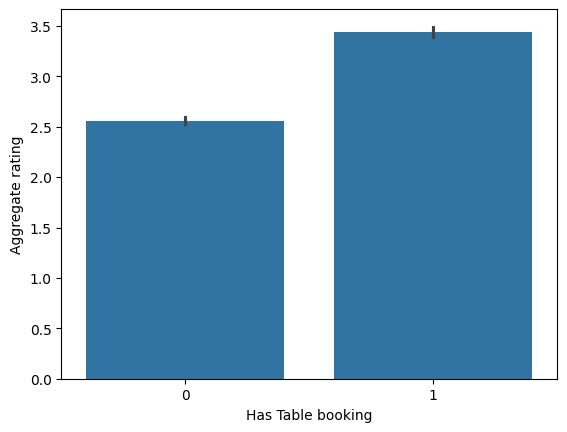

In [31]:
sns.barplot(x="Has Table booking",y="Aggregate rating",data=df)

WE SEE THAT THE RESTAURANTS WHICH HAVE TABLE BOOKING HAVE HIGHER RATING THAN THE ONES WHICH DONT

<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

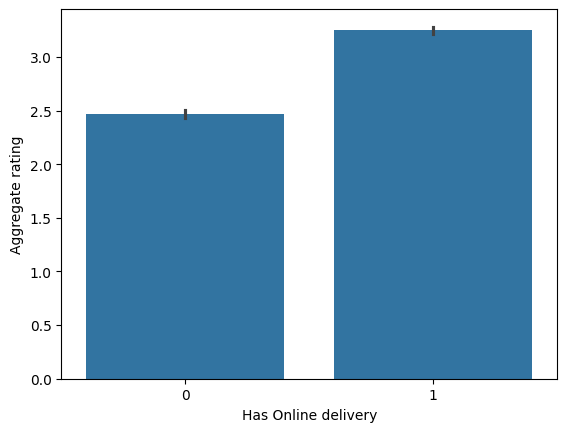

In [32]:
sns.barplot(x="Has Online delivery",y="Aggregate rating",data=df)

WE SEE THAT THE RESTAURANTS WHICH HAVE ONLINE DELIVERY HAVE HIGHER RATING THAN THE ONES WHICH DONT

<Axes: xlabel='Is delivering now', ylabel='Aggregate rating'>

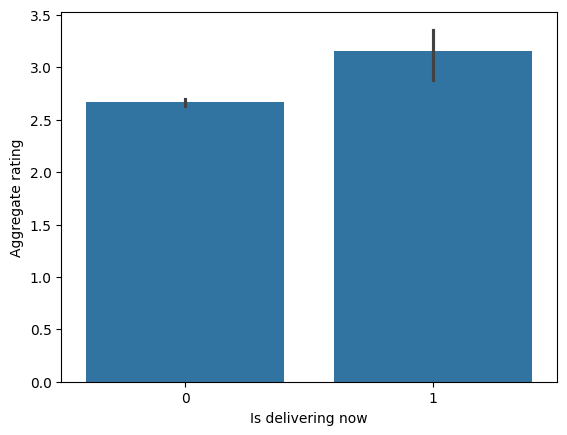

In [33]:
sns.barplot(x="Is delivering now",y="Aggregate rating",data=df)

WE SEE THAT THE RESTAURANTS THAT ARE DELIVERING NOW HAVE A HIGHER RATING THAN THE ONES THAT DONT

<Axes: xlabel='City', ylabel='Aggregate rating'>

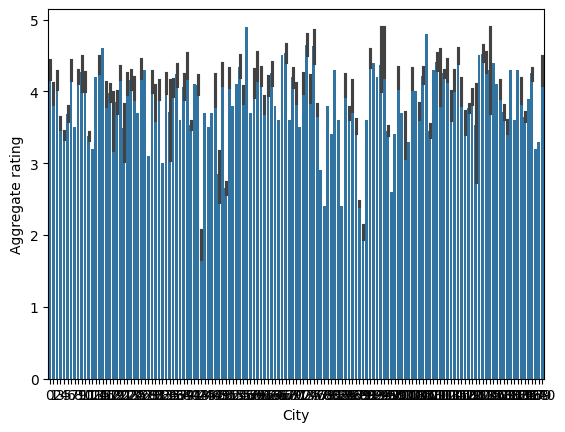

In [36]:
sns.barplot(x="City",y="Aggregate rating",data=df)

We donot get much information from here 